In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


In [67]:
test = pd.read_csv('Test data.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [35]:
target = pd.read_csv('Training data target.csv')

In [69]:
train = pd.read_csv('Training data.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [99]:
merged = train.merge(target, on='id')
merged["amount_tsh"].info()

AttributeError: 'Series' object has no attribute 'info'

In [101]:
merged["gps_height"].describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

In [113]:
merged[["status_group"]].value_counts()

status_group           
functional                 32259
non functional             22824
functional needs repair     4317
dtype: int64

In [117]:
merged2 = merged[merged["gps_height"]<0]
#merged2["gps_height"].value_counts().sum()
merged2

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
34,41583,0.0,2/23/2011,NaN,-41,NaN,39.812912,-7.889986,Msikitini Wa Ijumaa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
152,60983,0.0,3/16/2013,0,-15,0,39.527114,-6.988748,Msikitini,0,...,salty,salty,dry,dry,machine dbh,borehole,groundwater,other,other,non functional
181,68908,0.0,3/5/2011,NaN,-21,NaN,39.670943,-7.906606,Royal,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
184,2136,0.0,2/22/2011,NaN,-16,NaN,39.854320,-7.783063,Mvivini,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
249,35193,0.0,3/16/2011,Amref,-19,AMREF,39.244178,-7.368293,Kwa,0,...,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59200,20017,0.0,2/8/2013,Amref,-3,Amref,40.160806,-10.578354,Kwa Rashid Haya,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
59243,3396,50.0,3/16/2013,0,-20,0,39.524021,-6.984802,Kwa Mariwala,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59251,65997,0.0,1/24/2013,Serikali,-37,Serikali,39.736299,-9.884813,Kwa Asha Mgugi,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe multiple,communal standpipe,functional
59351,55322,50.0,3/18/2013,0,-19,0,39.534599,-7.088183,Kwa China,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional


In [119]:
merged2 = merged["construction_year"]
#merged2["gps_height"].value_counts().sum()
merged2

0        1999
1        2010
2        2009
3        1986
4           0
         ... 
59395    1999
59396    1996
59397       0
59398       0
59399    2002
Name: construction_year, Length: 59400, dtype: int64

In [45]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [52]:
dat= merged.groupby(['region'])

dataregstat = dict(list(datam))

dataregstat['Arusha']


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
35,57355,0.0,3/28/2013,Not Known,1546,Not known,36.618699,-3.293003,Sekondari,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,non functional
44,1843,20.0,3/18/2013,Government Of Tanzania,1007,DWE,36.806079,-3.478559,Kwa Bariki,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
57,22961,0.0,8/3/2013,Olgilai Village Community,1583,Olgilai village community,36.721127,-3.339812,Zahanati,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
63,8265,0.0,5/3/2013,Adra,1365,Adra /Community,36.947451,-3.350026,Thadayo,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
77,15622,0.0,3/18/2013,Government Of Tanzania,905,RWE,36.931659,-3.557034,Miembeni Primary School,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59267,45803,50.0,3/30/2013,Isf,1102,ISF,35.395217,-3.496710,Mnadani,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59280,52611,0.0,3/13/2013,Government Of Tanzania,1310,Community,36.783388,-3.370751,Mrema,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
59285,35783,0.0,3/20/2013,Government Of Tanzania,1105,DWE,36.781622,-3.437946,Kwa Wilson,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59307,61578,20.0,3/18/2013,Government Of Tanzania,974,DWE,36.818428,-3.489770,Kwa Stephan,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [53]:
# access analytics on a groupby object - but only on some columns
datam[['population','amount_tsh']].agg([np.mean, np.std, np.sum])


population                        amount_tsh               \
                     mean         std      sum         mean          std   
region                                                                     
Arusha         262.239104  442.690742   878501   360.923881  2274.915820   
Dar es Salaam  240.843478  534.198421   193879   236.706832  2612.250698   
Dodoma           0.000000    0.000000        0     0.000000     0.000000   
Iringa          94.304307  190.406908   499247  1206.347752  4782.562343   
Kagera           0.000000    0.000000        0     0.000000     0.000000   
Kigoma         500.241832  590.075269  1408681   347.658026   851.803578   
Kilimanjaro    105.747888  294.260177   463070   256.826821  2184.879625   
Lindi          364.404916  400.230048   563370    28.405563   171.470406   
Manyara        317.778269  582.243701   503043   262.463677  1675.603743   
Mara           538.794312  831.300180  1060886   108.880650  1422.520225   
Mbeya            0.000000    0.000000        0     0.000000     0.000000   
Morogoro       264.625562  336.062820  1060090   210.126560   460.435449   
Mtwara         267.441618  443.022905   462674    59.564162   399.002941   
Mwanza          65.315925  246.133684   202610    15.490006   247.423489   
Pwani          349.486148  970.349223   920896   656.108159  7338.366671   
Rukwa          365.795907  743.326322   661359   821.811394  2904.344383   
Ruvuma         199.019318  448.254062   525411   897.084091  2788.043739   
Shinyanga       14.100963   86.515685    70251    11.280610   708.964882   
Singida        279.122312  494.217041   584203   451.232776  7720.844020   
Tabora           0.000000    0.000000        0     0.000000     0.000000   
Tanga          246.753828  790.250035   628482   286.014134  4159.589957   

                           
                      sum  
region                     
Arusha         1209095.00  
Dar es Salaam   190549.00  
Dodoma               0.00  
Iringa         6386405.00  
Kagera               0.00  
Kigoma          979005.00  
Kilimanjaro    1124644.65  
Lindi            43915.00  
Manyara         415480.00  
Mara            214386.00  
Mbeya                0.00  
Morogoro        841767.00  
Mtwara          103046.00  
Mwanza           48050.00  
Pwani          1728845.00  
Rukwa          1485835.00  
Ruvuma         2368302.00  
Shinyanga        56200.00  
Singida         944430.20  
Tabora               0.00  
Tanga           728478.00

In [115]:
# access analytics on a groupby object - but only on some columns
merged[["num_private"]].value_counts()



num_private
0              58643
6                 81
1                 73
8                 46
5                 46
               ...  
60                 1
30                 1
55                 1
35                 1
1776               1
Length: 65, dtype: int64

In [114]:
merged[["population"]].value_counts()

population
0             21381
1              7025
200            1940
150            1892
250            1681
              ...  
166               1
895               1
887               1
886               1
30500             1
Length: 1049, dtype: int64

In [ ]:
amount_tsh

Replace function
1 = one simple replacement
#data['Sex'].replace({'male':0.0, 'female':1.0}, inplace = True)

Lambda function is different in that more functions can be applied (within ranges or certain types turn into something else

In [50]:
datam = merged.groupby(['status_group'])
datam

In [28]:
training_target.value_counts()

id     status_group           
0      non functional             1
49483  functional                 1
49469  non functional             1
49471  functional needs repair    1
49473  functional                 1
                                 ..
24724  functional                 1
24725  functional                 1
24726  functional                 1
24727  functional                 1
74247  non functional             1
Length: 59400, dtype: int64

In [51]:
# access analytics on a groupby object - but only on some columns
datam[['population','amount_tsh']].agg([np.mean, np.std, np.sum])


population                       amount_tsh  \
                               mean         std      sum        mean   
status_group                                                           
functional               187.553303  513.198991  6050282  461.798235   
functional needs repair  175.102154  433.033756   755916  267.071577   
non functional           170.016430  413.094978  3880455  123.481230   

                                                   
                                 std          sum  
status_group                                       
functional               3889.735284  14897149.25  
functional needs repair  1925.026420   1152948.00  
non functional           1110.120571   2818335.60

In [27]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [47]:
merged["payment"].value_counts(1)

never pay                0.426734
pay per bucket           0.151263
pay monthly              0.139731
unknown                  0.137323
pay when scheme fails    0.065892
pay annually             0.061313
other                    0.017744
Name: payment, dtype: float64

<AxesSubplot:>

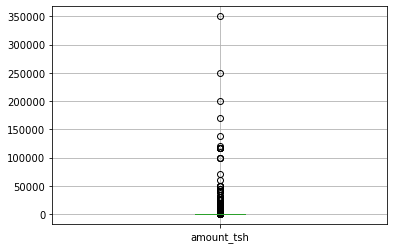

In [48]:
merged.boxplot(column='amount_tsh')


In [46]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [14]:
training_target

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [29]:
training_target['status_group'].value_counts()



functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [ ]:
df= df.drop(["date_recorded","longitude", "latitude","waterpoint_type_group", "subvillage", "region" , "lga", "ward", "recorded_by", "scheme_management","scheme_name", "extraction_type",
            "extraction_type_group","management_group", "payment", "water_quality","quantity_group", "source_type"], axis=1)